Map using K-Means Clustering


/Users/adityamittal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/adityamittal/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


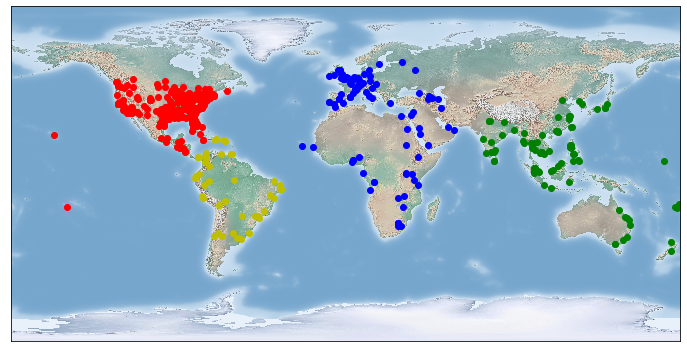

Map using DBScan Clustering


/Users/adityamittal/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


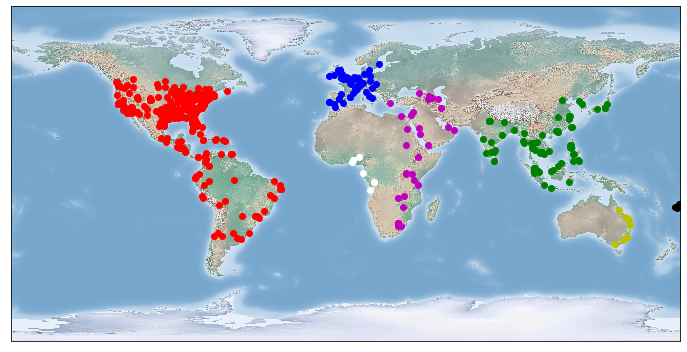

Table with K-Means Clusters
            cities  latitude  longitude countrycode  cluster_label
0            Miami  25.77427  -80.19366          US              3
1    New York City  40.71427  -74.00597          US              3
2      Miami Beach  25.79065  -80.13005          US              3
3           Recife  -8.05389  -34.88111          BR              0
4           Dallas  32.78306  -96.80667          US              3
..             ...       ...        ...         ...            ...
645      Jerusalem  31.76904   35.21633          IL              2
646         Indang  14.19528  120.87694          PH              1
647           Suva -18.14161  178.44149          FJ              1
648    Bella Vista  18.45539  -69.94540          DO              0
649  Wichita Falls  33.91371  -98.49339          US              3

[579 rows x 5 columns]

Table with DBScan Clusters
            cities  latitude  longitude countrycode  db_label
0            Miami  25.77427  -80.19366          US   

In [113]:
#Libraries
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from math import radians, cos, sin, sqrt, asin


#Reading in Dataframe
df = pd.read_csv('latitude_longitude.csv')
del df['Unnamed: 0']


#Converting Dataframe
skdf = {'latitude': [], 'longitude':[]}
hdf = {'cities': [], 'latitude':[], 'longitude':[], 'countrycode':[]}
for i in df['latitude']:
    skdf['latitude'].append(i)
    hdf['latitude'].append(i)
for i in df['longitude']:
    skdf['longitude'].append(i)
    hdf['longitude'].append(i)
for i in df['cities']:
    hdf['cities'].append(i)
for i in df['countrycode']:
    hdf['countrycode'].append(i)

df1 = pd.DataFrame(data = skdf)
df_with_cities = pd.DataFrame(data = hdf)
df_with_cities_dbscan = pd.DataFrame(data = hdf)


#Removing NaN values in Dataframe
df1 = df1.dropna(thresh = 2)
df_with_cities = df_with_cities.dropna(thresh=2)
df_with_cities_dbscan = df_with_cities_dbscan.dropna(thresh=2)

#Elbow Curve
# clusters = range(1, 20)
# kmeans_elbow = [KMeans(n_clusters=i) for i in clusters]
# score = [kmeans_elbow[i].fit(df1).score(df1) for i in range(len(kmeans_elbow))]
# plt.plot(clusters, score)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Score')
# plt.title('Elbow Curve')
# plt.show()

#Adding to Dataframe
df_with_cities["cluster_label"] = kmeans_elbow[3].fit(df1).labels_
df1["cluster_label"] = kmeans_elbow[3].fit(df1).labels_

#Applying K-Means Clustering (4 clusters)
# kmeans = KMeans(n_clusters=4).fit(df1)
# centroids = kmeans.cluster_centers_

# plt.scatter(df1['latitude'], df1['longitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
# plt.show()


#Plotting Latitude and Longitude with K-Means
print("Map using K-Means Clustering")
map_plotter = Basemap()
fig = plt.figure(figsize = (12,8))
coordinates = []
for index in df1.index:
    coordinates.append([df1['latitude'][index], df1['longitude'][index], df1['cluster_label'][index]])
    
cluster_vals = {'0_long': [], '0_lat':[], '1_long': [], '1_lat':[], '2_long': [], '2_lat':[], '3_long': [], '3_lat':[]}
for index in df1.index:
    cluster_vals[str(df1['cluster_label'][index])+'_long'].append(df1['longitude'][index])
    cluster_vals[str(df1['cluster_label'][index])+'_lat'].append(df1['latitude'][index])

for target,color in zip(['0', '1', '2', '3'], ['r', 'g', 'b', 'y']):
     indexs = df1['cluster_label'] == target
     map_plotter.scatter(cluster_vals[target+'_long'], cluster_vals[target+'_lat'], latlon=True, c = color)
     map_plotter.shadedrelief()
plt.show()

#With DBScan
#Function that returns the Great Circle Distance between two points
def haversine(point_a, point_b):
    # convert decimal degrees to radians 
    lon1, lat1 = point_a[0], point_a[1]
    lon2, lat2 = point_b[0], point_b[1]
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r

#Implementing the DBScan Algorithm (7 clusters)
points = []
for index in df1.index:
    points_inside = []
    points_inside.append(df1['latitude'][index])
    points_inside.append(df1['longitude'][index])
    points.append(points_inside)

clusters = DBSCAN(eps=1000, min_samples=3, metric=haversine).fit_predict(points)
just_cluster_info = []
for i, cluster in enumerate(clusters):
    just_cluster_info.append(cluster)

df_with_cities_dbscan['db_label'] = just_cluster_info
df1['db_label'] = just_cluster_info

df_with_cities_dbscan = df_with_cities_dbscan.loc[df_with_cities_dbscan['db_label']!=-1, ['cities', 'latitude', 'longitude', 'countrycode', 'db_label']]

#Printing Longitude and Latitude with DBScan
print("Map using DBScan Clustering")
fig = plt.figure(figsize = (12,8))
coordinates_new = []
for index in df1.index:
    coordinates_new.append([df1['latitude'][index], df1['longitude'][index], df1['db_label'][index]])
    
cluster_values = {'0_long': [], '0_lat':[], '1_long': [], '1_lat':[], '2_long': [], '2_lat':[], '3_long': [], '3_lat':[], 
                '4_long': [], '4_lat':[], '5_long': [], '5_lat':[], '5_long': [], '5_lat':[], '5_long': [], '5_lat':[],
                '6_long': [], '6_lat':[]}
for index in df_with_cities_dbscan.index:
    #print(str(df_with_cities_dbscan['db_label'][index])+'_long')
    cluster_values[str(df_with_cities_dbscan['db_label'][index])+'_long'].append(df_with_cities_dbscan['longitude'][index])
    cluster_values[str(df_with_cities_dbscan['db_label'][index])+'_lat'].append(df_with_cities_dbscan['latitude'][index])

for target,color in zip(['0', '1', '2', '3', '4', '5', '6'], ['r', 'g', 'b', 'y', 'm', 'w', 'k']):
     indexs = df_with_cities_dbscan['db_label'] == target
     map_plotter.scatter(cluster_values[target+'_long'], cluster_values[target+'_lat'], latlon=True, c = color)
     map_plotter.shadedrelief()
plt.show()

print("Table with K-Means Clusters")
print(df_with_cities)
print()

print("Table with DBScan Clusters")
print(df_with_cities_dbscan)